In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.datasets as datas
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns



In [2]:
url = "https://raw.githubusercontent.com/marcanthonny/projectDSML/refs/heads/main/food_orders_new_delhi%20(1).csv"
df = pd.read_csv(url,encoding='windows-1252', delimiter=',')

In [3]:
df.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [4]:
df.dtypes

Order ID                   int64
Customer ID               object
Restaurant ID             object
Order Date and Time       object
Delivery Date and Time    object
Order Value                int64
Delivery Fee               int64
Payment Method            object
Discounts and Offers      object
Commission Fee             int64
Payment Processing Fee     int64
Refunds/Chargebacks        int64
dtype: object

In [5]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [6]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64


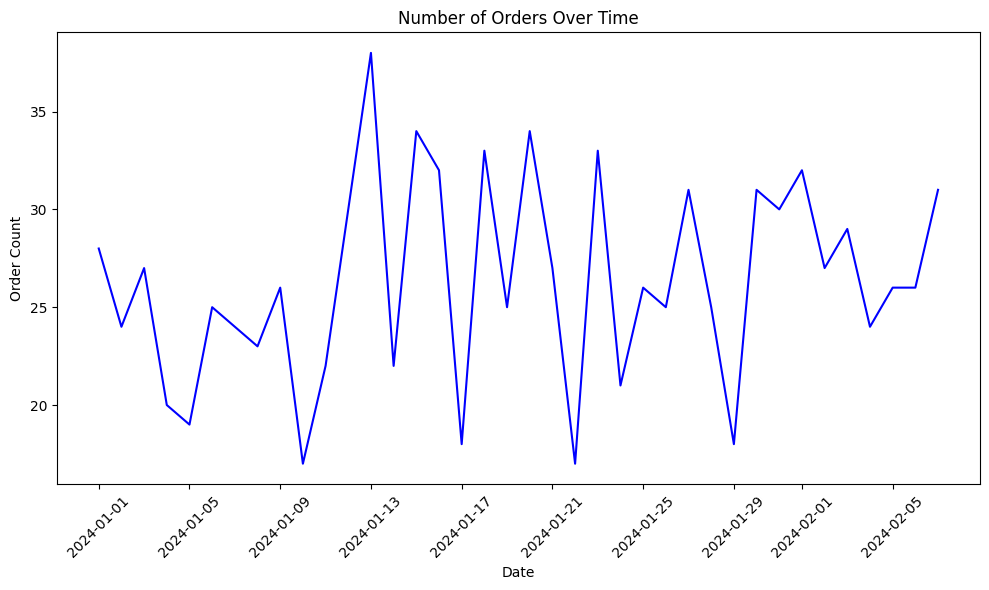

In [7]:
# Fill missing values for 'Discounts and Offers' with 'No Offer' as a placeholder
df['Discounts and Offers'] = df['Discounts and Offers'].fillna('No Offer')

# 2. Order Volume Over Time
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Order Date'] = df['Order Date and Time'].dt.date

# Group by Date to get the count of orders per day
orders_per_day = df.groupby('Order Date')['Order ID'].count()

plt.figure(figsize=(10,6))
orders_per_day.plot(kind='line', color='blue')
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\hi\AppData\Local\Temp\ipykernel_16488\3627885141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette="Set2")


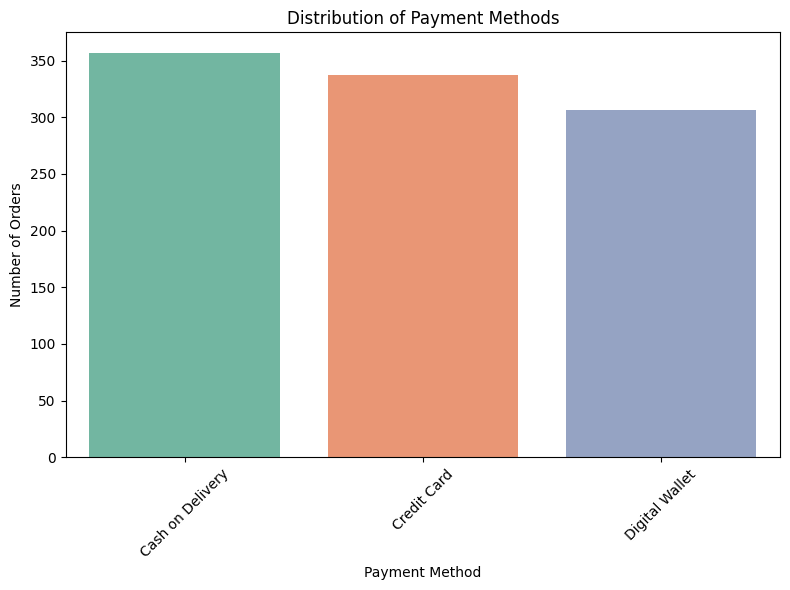

In [8]:
# 3. Payment Method Distribution
plt.figure(figsize=(8,6))
payment_method_counts = df['Payment Method'].value_counts()
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette="Set2")
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

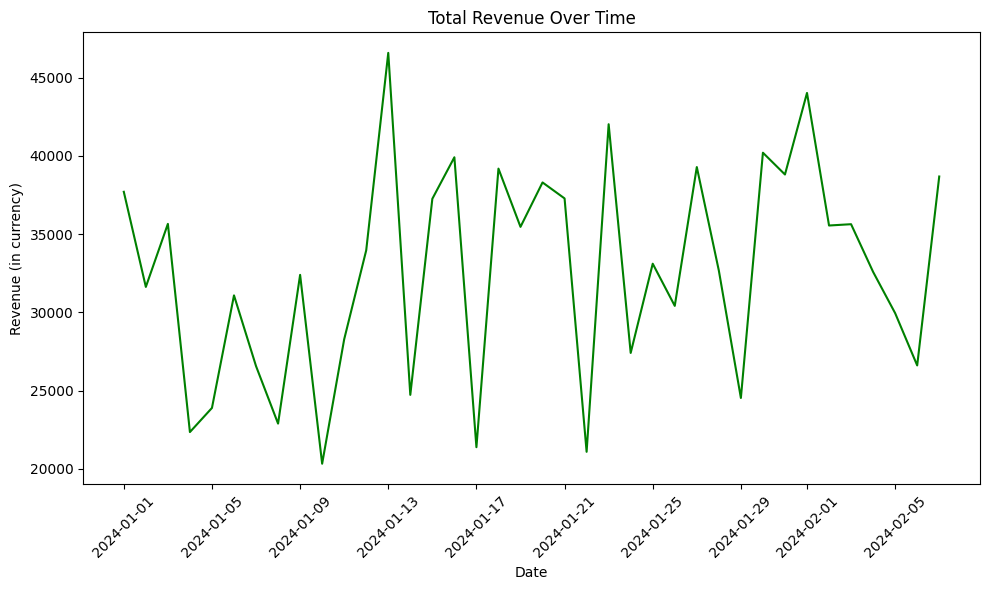

In [9]:
# 4. Revenue Analysis
df['Order Value'] = pd.to_numeric(df['Order Value'], errors='coerce')
df['Delivery Fee'] = pd.to_numeric(df['Delivery Fee'], errors='coerce')
df['Commission Fee'] = pd.to_numeric(df['Commission Fee'], errors='coerce')
df['Payment Processing Fee'] = pd.to_numeric(df['Payment Processing Fee'], errors='coerce')

df['Total Revenue'] = df['Order Value'] + df['Delivery Fee'] + df['Commission Fee'] + df['Payment Processing Fee']

# Group by Date to get daily revenue
daily_revenue = df.groupby('Order Date')['Total Revenue'].sum()

plt.figure(figsize=(10,6))
daily_revenue.plot(kind='line', color='green')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (in currency)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

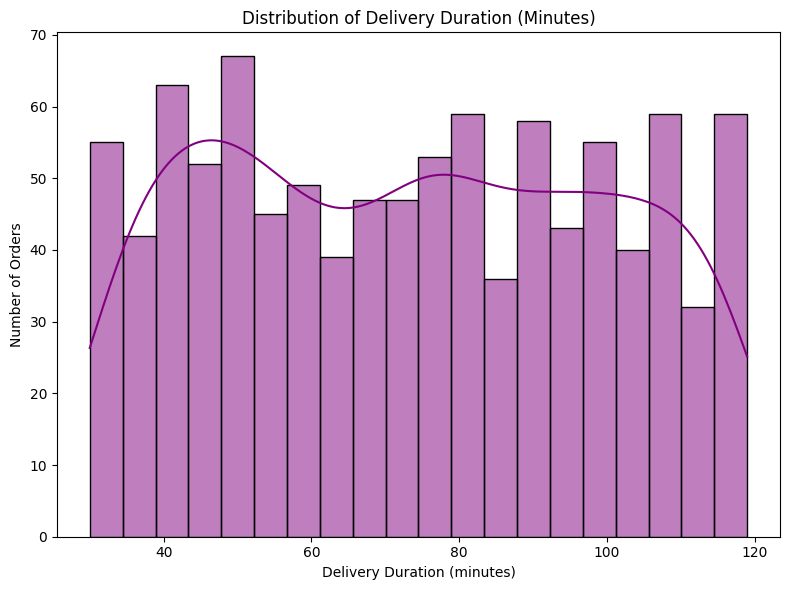

In [21]:
# 5. Delivery Time Analysis
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])
df['Delivery Duration'] = (df['Delivery Date and Time'] - df['Order Date and Time']).dt.total_seconds() / 60.0  # In minutes

plt.figure(figsize=(8,6))
sns.histplot(df['Delivery Duration'], bins=20, kde=True, color='purple')
plt.title('Distribution of Delivery Duration (Minutes)')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

C:\Users\hi\AppData\Local\Temp\ipykernel_22772\3819537338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=offer_counts.index, y=offer_counts.values, palette="Set1")


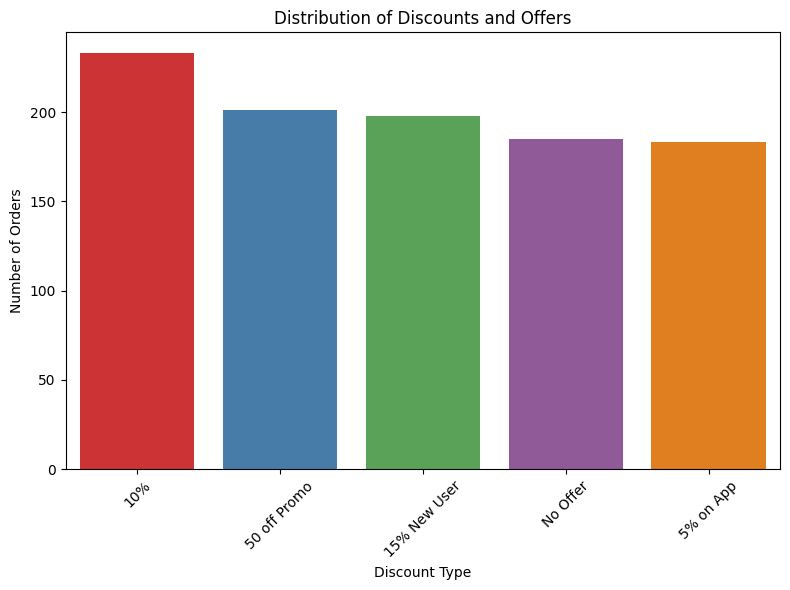

In [22]:
# 6. Discounts and Offers Usage
plt.figure(figsize=(8,6))
offer_counts = df['Discounts and Offers'].value_counts()
sns.barplot(x=offer_counts.index, y=offer_counts.values, palette="Set1")
plt.title('Distribution of Discounts and Offers')
plt.xlabel('Discount Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\hi\AppData\Local\Temp\ipykernel_22772\275396846.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=refund_counts.index, y=refund_counts.values, palette="coolwarm")


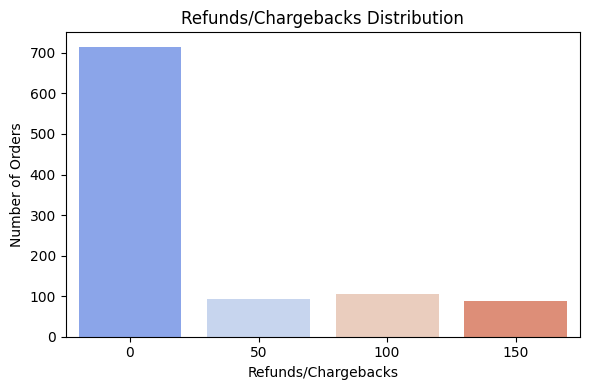

In [23]:
# 7. Refunds/Chargebacks Analysis
refund_counts = df['Refunds/Chargebacks'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=refund_counts.index, y=refund_counts.values, palette="coolwarm")
plt.title('Refunds/Chargebacks Distribution')
plt.xlabel('Refunds/Chargebacks')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

C:\Users\hi\AppData\Local\Temp\ipykernel_22772\4231399013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_order_counts.index, y=customer_order_counts.values, palette="Blues_d")


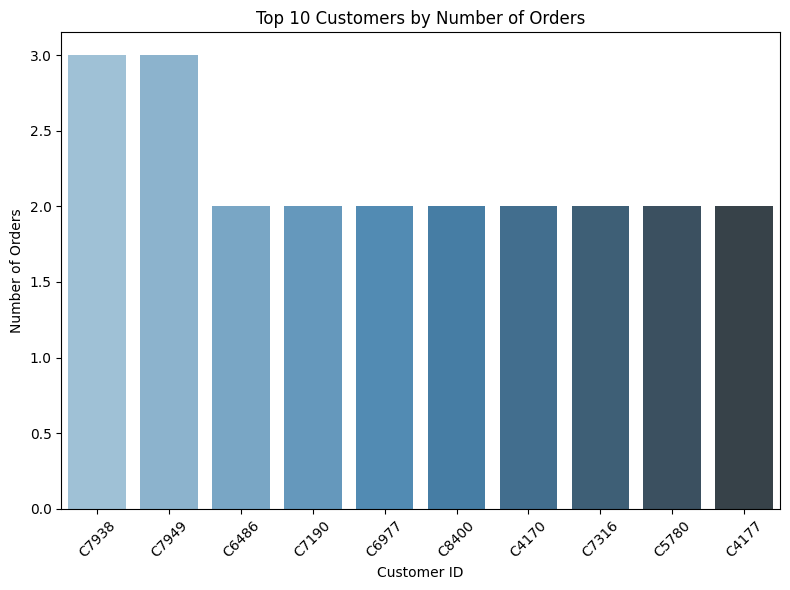

In [24]:
# 8. Customer Order Analysis
plt.figure(figsize=(8,6))
customer_order_counts = df['Customer ID'].value_counts().nlargest(10)  # Top 10 customers by order count
sns.barplot(x=customer_order_counts.index, y=customer_order_counts.values, palette="Blues_d")
plt.title('Top 10 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


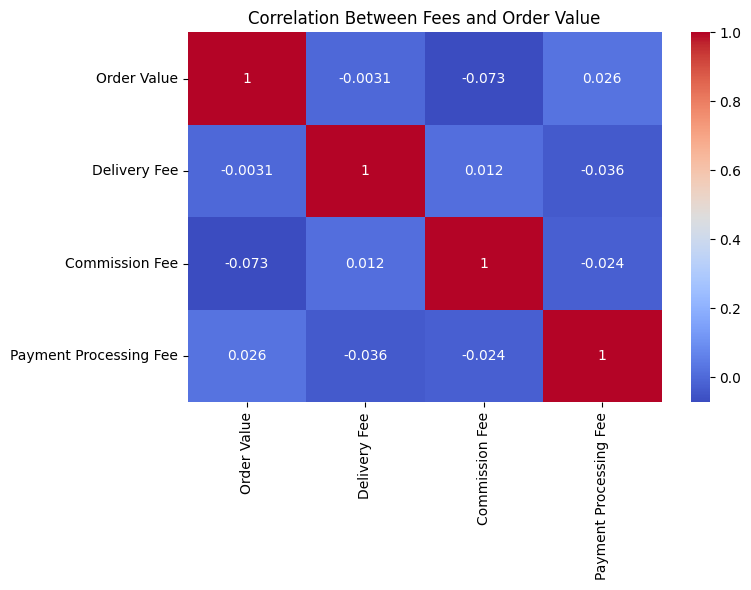

In [10]:
# 9. Correlation Analysis (Revenue and Fees)
plt.figure(figsize=(8,6))
corr_matrix = df[['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Fees and Order Value')
plt.tight_layout()
plt.show()